# Fit and Apply Multi-Output Linear Regression Model

In this exercise we fit and apply a a multi-output model on a synthetic dataset and evaluate the results.

**Learning Outcomes**
1. Fit and apply a multi-output linear regression model on a dataset
2. Fit and apply a multi-output linear regression model using *Sochastic* Gradient descent
3. Compare between the capabilities of different models using R2

In [117]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import time

# Generate the Data

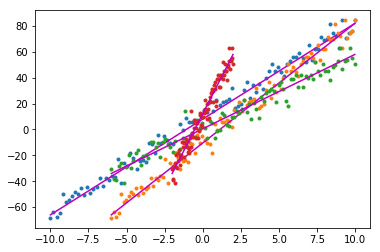

In [133]:
# generate the data
def realFunc(x1, x2, basis=False):
    if not basis:    return 2 + 5*x1 + 3*x2
    else:            return 2 + 5*x1**2
    
def generate_data(N=100, noise=5, basis=False):
    N = N
    noise = noise
    
    x1 = np.linspace(-10.0,10.0,N) 
    x2 = np.linspace(-6.0, 10.0,N) 
    x3 = np.linspace(-2.0, 2.0, N) 
    
    t1 = np.random.normal(realFunc(x1,x2,basis),noise) # target1
    t2 = np.random.normal(realFunc(x2,x3,basis),noise+1) # target2

    #plot the data along the real model
    plt.plot(x1,t1,'.')
    plt.plot(x1,realFunc(x1,x2,basis),'m')

    plt.plot(x2,t1,'.')
    plt.plot(x2,realFunc(x1,x2,basis),'m')
    
    plt.plot(x2,t2,'.')
    plt.plot(x2,realFunc(x2,x3,basis),'m')

    plt.plot(x3,t2,'.')
    plt.plot(x3,realFunc(x2,x3,basis),'m')

    
    # generate model solution
    x0= np.ones(len(x1))
    X = np.c_[x0, x1, x2, x3]
    T = np.c_[t1, t2]

    X = np.matrix(X)
    T = np.matrix(T)
    
    return X, T


X, T = generate_data(basis=False)   # generate without polynomial basis function
#X, T = generate_data(basis=True)   # generate with polynomial basis function, if you used this then you would need to 
                                    # implement a basis fucntion as we did in an earlier exercise otherwise you'll get high rmse

In [134]:
print(X.shape)
print(T.shape)

(100, 4)
(100, 2)


In [129]:
def outGD(J, W, tme, name='SGD',ax=None, plotJ=True, printw=True):        
    if plotJ:
        ax = ax or plt.gca()
        ax.plot(J[1:],'.b')
    if printw:
        print(  "y[1] = {:.3f} + {:.3f} X1 + {:.3f} X2 + {:.3f} X3".format(W[0,0],W[1,0],W[2,0],W[3,0]),
              "\ny[2] = {:.3f} + {:.3f} X1 + {:.3f} X2 + {:.3f} X3".format(W[0,1],W[1,1],W[2,1],W[3,1]),'\n',
              " {} took:    {:.6f} seconds ".format(name, tme))


In [130]:
def SGD_LR(X, T, eta=0.001, maxep=100, decay=0.98, b=25): # vectorised
    start_time = time.time()
    b = b                                # mini-batch size
    N = X.shape[0]                       # number of data points    
    M = X.shape[1]
    K = T.shape[1]
    
    W = np.zeros((M,K))                  # initialise W
    J = np.zeros((maxep))                # the loss in each epoch
    for ep in range(maxep):              # epochs
        for tau in range(int(N/b)):      # No. of batches
            
            X_= X[tau*b:(tau+1)*b,:]     # take input batch 
            T_= T[tau*b:(tau+1)*b,:]     # take corresponding target batch
            
            # we use * as matrices multiplcaiton below because the data is already converted to numpy matrices (not arrays)
            # however it is possible to use @ new operator, introduced in version 3.5 to do the same operation on numpy arrays.
            W +=  (1.0/(  N))*eta*X_.T*(T_ - X_*W)           # mini-batch Weights update
            J_ =  ((1.0/(2*N))*np.array(T_ - X_*W)**2)       # mini-batch loss
            
            J[ep]+=J_.sum()
            
        eta *= decay
    tme = time.time() - start_time
    return W, np.round(np.sqrt(J),4), tme

In [131]:
def predict(X, W):
    return X*W

averaged model error =  125.2684
y[1] = 36.037 + -31.553 X1 + 46.832 X2 + -6.311 X3 
y[2] = 24.273 + -11.736 X1 + 39.158 X2 + -2.347 X3 
  SGD_LR took:    0.008975 seconds 


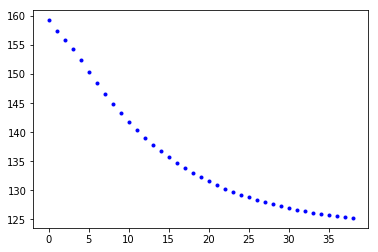

In [132]:
W, J, tme = SGD_LR(X, T, eta=0.01, maxep=40, decay=0.99) #, eta, maxep, decay,ax2)

print('averaged model error = ', J[-1])      # note that this will be close to the noise that we add when we generated the data

outGD(J, W, tme, 'SGD_LR')


Now we compare between the capabilities of the two models. We need to calculate the R2.
We can calculate the SSD and SST easily:

1. SSD is the sum of squared prediction errors
2. SST is the sum of squared error from the mean of the target
3. R2 = 1- SSD/SST

It shows how better is our prediction in comparison with predicting via the mean of the targets

In [126]:
Y_SGD = predict(X, W)

SSE = (np.array(T - Y_SGD   )**2).sum()  # convert back to an array in order to do element-wise multiplication
SST = (np.array(T - T.mean())**2).sum()
R2_SGD = 1- SSE/SST

print(R2_SGD)

0.9800002809871395


This shows that our prediction and the Neural Networks prediction are both very good for this simple data. Our SGD is faster because it has less built-in optimisations. Of course SGD is less capable when the data is non-linear.

Let us now generate new data via sklearn and apply a neural network regressor on the data

## Your Turn

1. Lookup a regression dataset from [kaggle](https://www.kaggle.com/datasets?search=Regression) or [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)
2. Try to perfrom a comparison between a multi-output linear regression model and a neural network model on the dataset
3. Try different basis 
4. Split the data into training and testing and apply the above training procedures on the training data and measure the performance (RMSE, R2) on the testing data.
4. Split the data into training and testing and apply the above training procedures on the training data and measure the performance (RMSE, R2) on the testing data.
5. Consider applying cross validation in the parameter optimisation procedure 